In [1]:
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
import trackpy
from iris.time import PartialDateTime

import tobac #tobac package cloned from https://github.com/tobac-project/tobac.git

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [2]:
Track = pd.read_hdf('Save/cold_core/Track.h5','table')

In [3]:
print(np.unique(Track.cell.values).shape[0], '  unique cloud cells in month Jan 2005. Features:', Track.shape[0])

556   unique cloud cells in month Jan 2005. Features: 11424


In [4]:
print(len(Track['cell'].dropna().unique()))

556


In [5]:
cold_core=[225,210,200,190]

In [6]:
for i in np.unique(Track.cell.values):
    subset = Track[Track.cell == i]
    if subset[subset.threshold_value <=225].shape[0] == 0:
        Track.drop(Track.loc[Track['cell']== i].index, inplace=True)

Track.to_hdf('Save/cold_core/Track_coldcore_225.h5','table')  

In [7]:
Track_225 = pd.read_hdf('Save/cold_core/Track_coldcore_225.h5','table')

print(np.unique(Track_225.cell.values).shape[0], '  unique cloud cells in month Jan 2005. Features:', Track_225.shape[0])

486   unique cloud cells in month Jan 2005. Features: 10728


In [8]:
for i in np.unique(Track.cell.values):
    subset = Track[Track.cell == i]
    if subset[subset.threshold_value <=210].shape[0] == 0:
        Track.drop(Track.loc[Track['cell']== i].index, inplace=True)

Track.to_hdf('Save/cold_core/Track_coldcore_210.h5','table')  

In [9]:
Track_210 = pd.read_hdf('Save/cold_core/Track_coldcore_210.h5','table')

print(np.unique(Track_210.cell.values).shape[0], '  unique cloud cells in month Jan 2005. Features:', Track_210.shape[0])

268   unique cloud cells in month Jan 2005. Features: 8203


In [10]:
for i in np.unique(Track.cell.values):
    subset = Track[Track.cell == i]
    if subset[subset.threshold_value <=200].shape[0] == 0:
        Track.drop(Track.loc[Track['cell']== i].index, inplace=True)

Track.to_hdf('Save/cold_core/Track_coldcore_200.h5','table')  

In [11]:
Track_200 = pd.read_hdf('Save/cold_core/Track_coldcore_200.h5','table')

print(np.unique(Track_200.cell.values).shape[0], '  unique cloud cells in month Jan 2005. Features:', Track_200.shape[0])

120   unique cloud cells in month Jan 2005. Features: 6458


In [12]:
for i in np.unique(Track.cell.values):
    subset = Track[Track.cell == i]
    if subset[subset.threshold_value <=190].shape[0] == 0:
        Track.drop(Track.loc[Track['cell']== i].index, inplace=True)

Track.to_hdf('Save/cold_core/Track_coldcore_190.h5','table')  

In [13]:
Track_190 = pd.read_hdf('Save/cold_core/Track_coldcore_190.h5','table')

print(np.unique(Track_190.cell.values).shape[0], '  unique cloud cells in month Jan 2005. Features:', Track_190.shape[0])


10   unique cloud cells in month Jan 2005. Features: 4954


<Figure size 640x480 with 0 Axes>

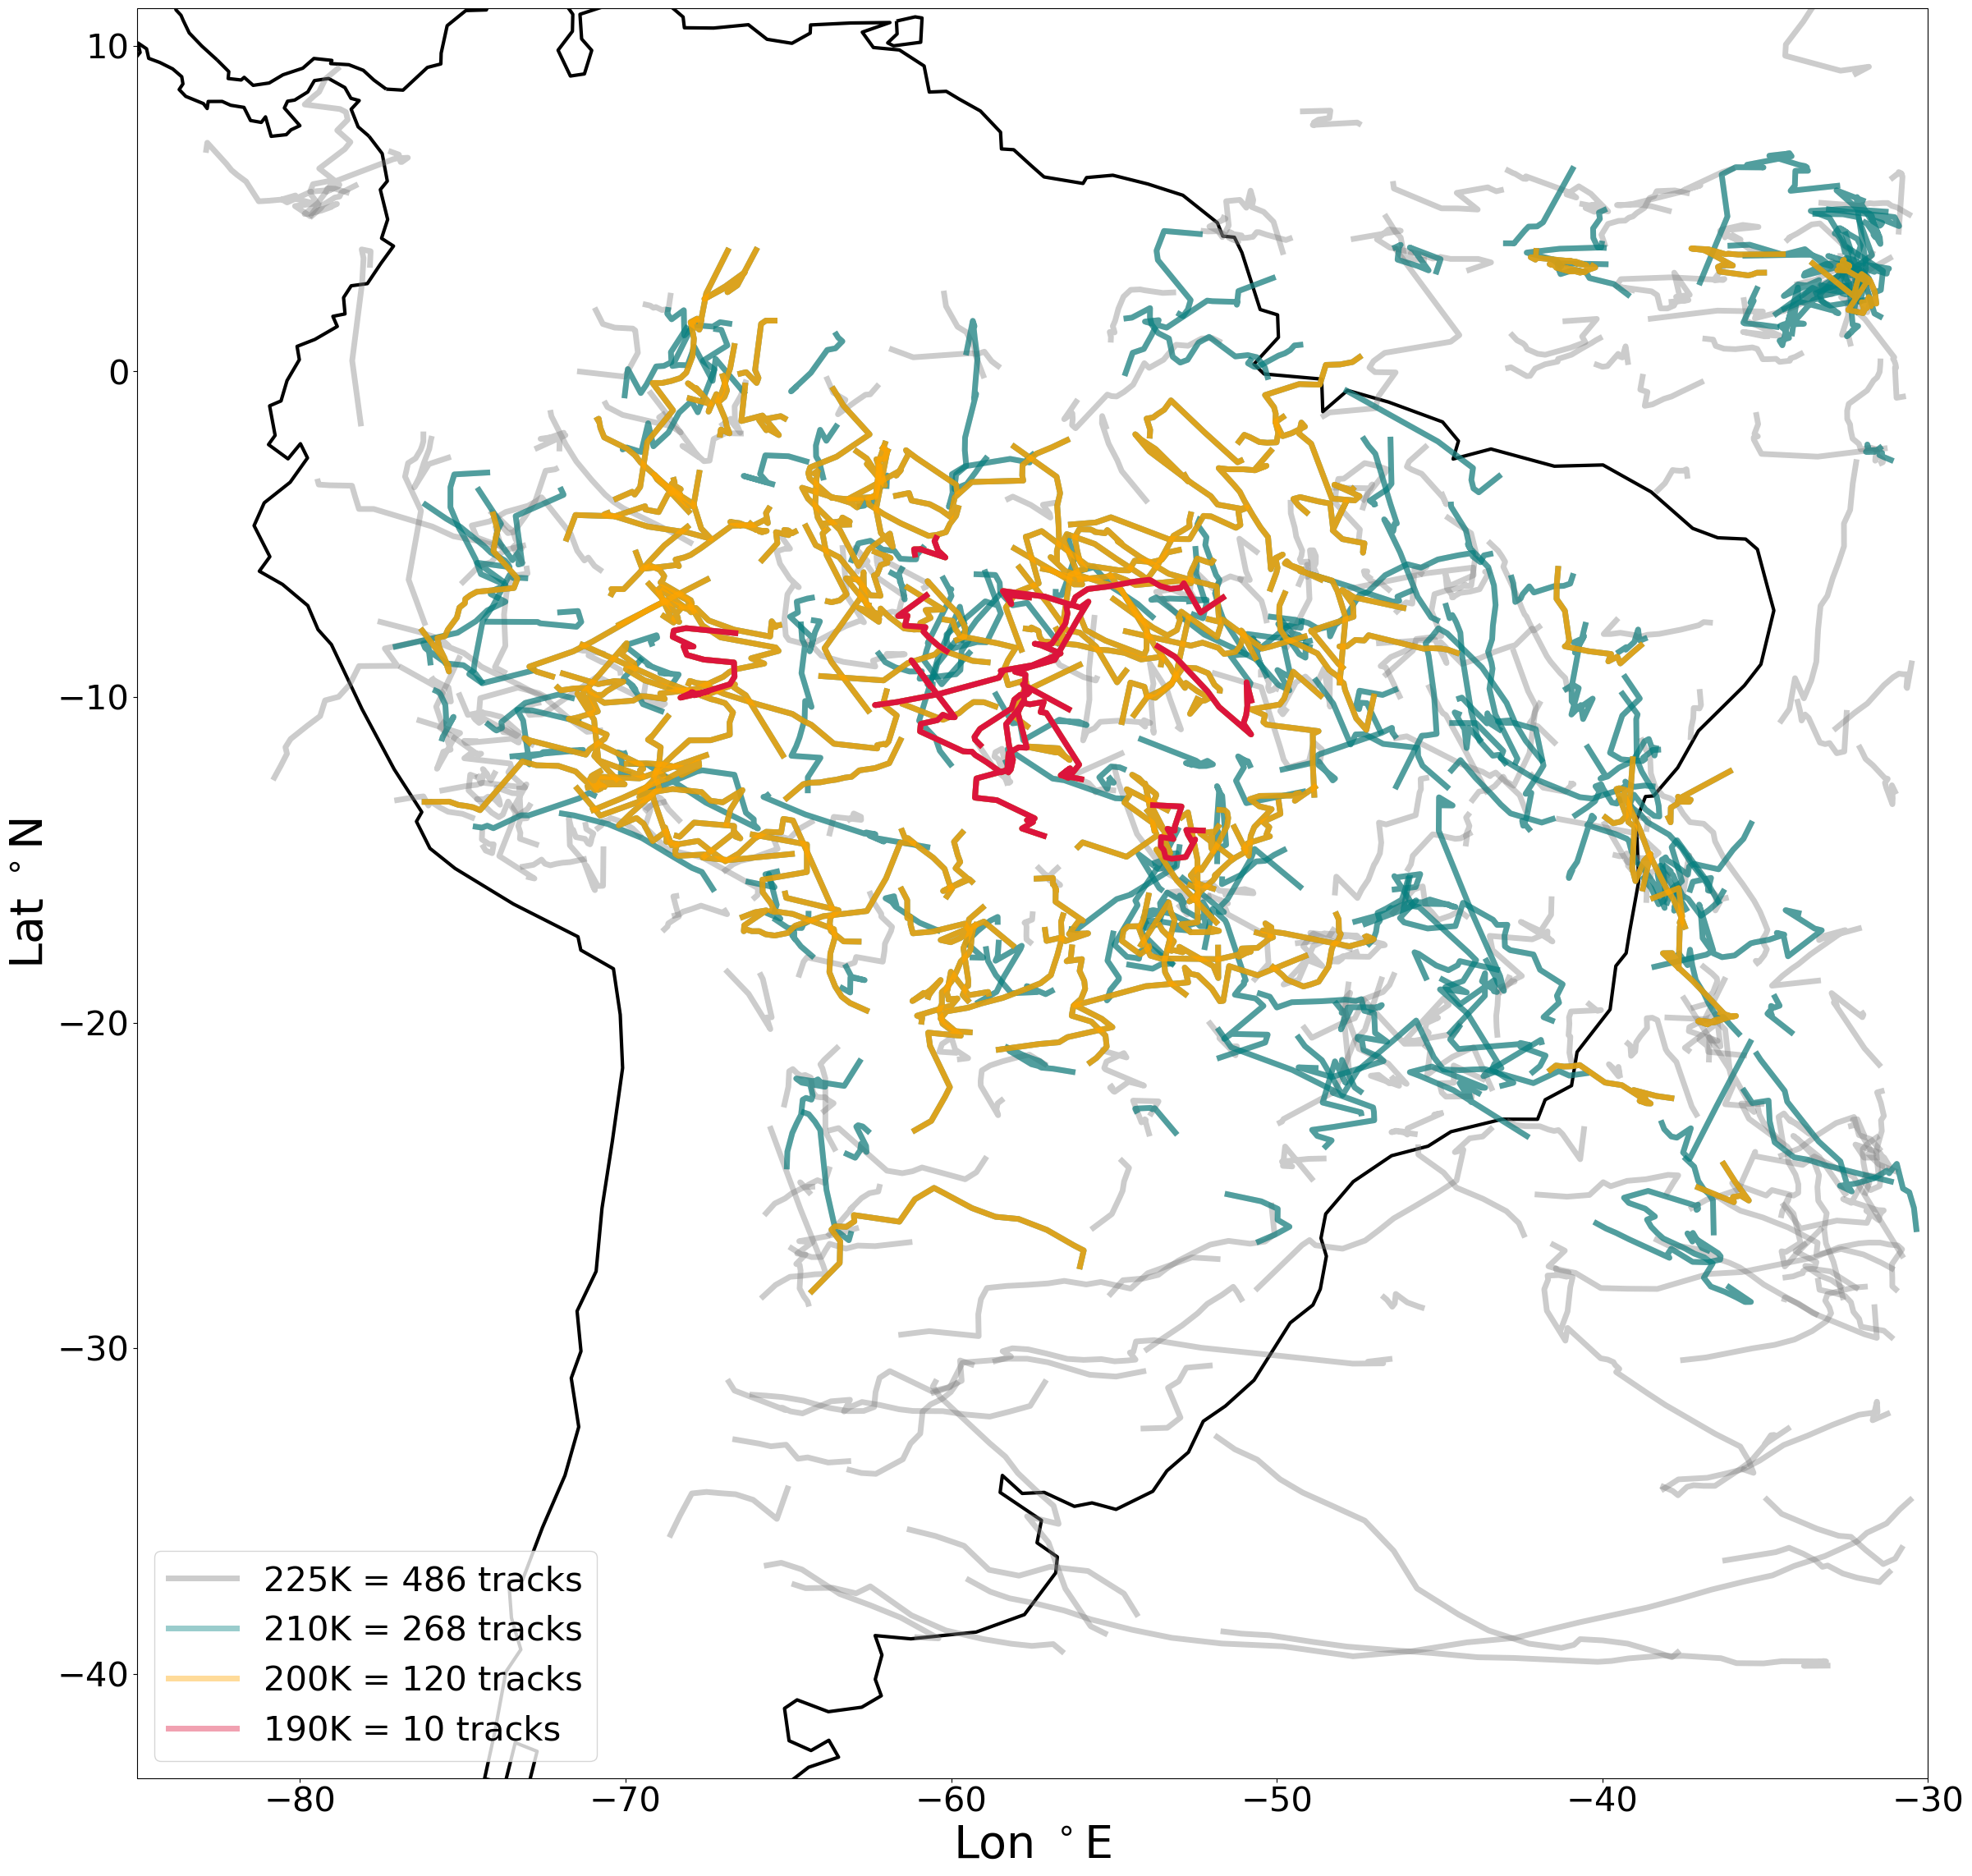

In [35]:
import cartopy.crs as ccrs
axis_extent=[-80,-30,-35,12]

#loop for each timestep:
plt.figure()

fig_map,ax_map=plt.subplots(figsize=(30,28),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map.set_extent([-85,-30,-40,10])
#tracks when using 225K cold core filter
for cell in Track_225['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i_225 = Track_225[Track_225['cell'] == cell]
    plt.plot(Track_i_225['longitude'],Track_i_225['latitude'], '-',linewidth=5,color='grey',alpha=0.4)

#tracks when using 210K cold core filter
for cell in Track_210['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i_210 = Track_210[Track_210['cell'] == cell]
    plt.plot(Track_i_210['longitude'],Track_i_210['latitude'], '-',linewidth=5,color='teal',alpha=0.6)

#tracks when using 200K cold core filter
for cell in Track_200['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i_200 = Track_200[Track_200['cell'] == cell]
    plt.plot(Track_i_200['longitude'],Track_i_200['latitude'], '-',linewidth=5,color='orange',alpha=0.8)

#tracks when using 190K cold core filter:
for cell in Track_190['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i_190 = Track_190[Track_190['cell'] == cell]
    plt.plot(Track_i_190['longitude'],Track_i_190['latitude'], '-',linewidth=5,color='crimson',)

#making legend labels for just 1 track in each filter:
cell_225 = 30
Track_225_1 = Track_225[Track_225['cell'] == cell_225]
plt.plot(Track_225_1['longitude'],Track_225_1['latitude'], '-', color='grey',alpha=0.4,label='225K = 486 tracks',linewidth=5)
Track_210_1 = Track_210[Track_210['cell'] == cell_225]
plt.plot(Track_210_1['longitude'],Track_210_1['latitude'], '-', color='teal',alpha=0.4,label='210K = 268 tracks',linewidth=5)
Track_200_1 = Track_200[Track_200['cell'] == cell_225]
plt.plot(Track_200_1['longitude'],Track_200_1['latitude'], '-', color='orange',alpha=0.4,label='200K = 120 tracks',linewidth=5)
Track_190_1 = Track_190[Track_190['cell'] == cell_225]
plt.plot(Track_190_1['longitude'],Track_190_1['latitude'], '-', color='crimson',alpha=0.4,label='190K = 10 tracks',linewidth=5)

plt.xticks([-80,-70,-60,-50,-40,-30],fontsize=30)
plt.yticks([-40,-30,-20,-10,0,10],fontsize=30)
plt.gca().coastlines(linewidth=3)
plt.legend(loc='best',fontsize=30)
plt.xlabel('Lon $^\circ$E', fontsize=40)
plt.ylabel('Lat $^\circ$N', fontsize=40)

plt.savefig('Plot/cold_core/testing_Tb_filter.png')